# Tutorial 2 (Week 2) - Descriptive Statistics and Hypothesis Testing

## Learning Objectives

After completing this tutorial, you should be able to:

+ Manipulate NumPy and Pandas data structures for statistics computation
  + Group the dataset by variable values
  + Filter the dataset for specific variable values
+ Compute descriptive statistics for a dataset
  + Compute statistics on arrays, Series, and DataFrame
  + Apply statistical measures for decision making
+ Fit a probability distribution to a dataset and estimate the parameters using SciPy
+ Perform hypothesis testing using SciPy

# Preface: Handling Data in Pandas and NumPy

In Tutorial 1, we have used Pandas DataFrames and NumPy arrays in creating visualizations. We will now look at these data structures in more details so that we can perform more advanced operations with our data.

_Tips:_ Throughout the tutorial, we will encounter various functions and properties in Pandas and NumPy. It is recommended that you make it a habit to look up the documentation (API reference and usage examples) of those you are not yet familiar with. This way, you form a better understanding of how you can use them in future, beyond the example problems in this tutorial.

In Jupyter Notebook, the references are conveniently linked under the `Help` menu.

In [4]:
import numpy as np
import pandas as pd

## NumPy Arrays

NumPy is a fundamental package for scientific computing in Python. The main object in NumPy is `ndarray`, also known by the alias `array`. 

Numpy `array` is a table of elements (usually numbers), which is:
- _Homogeneous_: elements are all of the same type;
- _Multi-dimensional_: elements can be arranged into more than one __axes__;
- _Indexed_: elements are addressable by a tuple of integers, one on each axis.

The following image ([source](https://predictivehacks.com/tips-about-numpy-arrays/)) illustrates the array structure.

<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png" width="500">

Note that `numpy.array` is not the same as the Standard Python Library class `array.array`, which only handles one-dimensional arrays.

Sample basic operations on numpy arrays are given below. Try running the codes and make sure you understand the output. You can go to [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html) for more examples and practice.

There are various ways to __create arrays__.

In [5]:
# One of many ways to create an array
a = np.arange(24).reshape(4, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

Take note of the array notation, and compare the above array display with the conceptual illustration to understand how it is represented in NumPy.

Some __properties:__

In [6]:
a.shape

(4, 3, 2)

In [7]:
a.ndim

3

In [8]:
a.size

24

There are several methods to create arrays with __initialed content__.

In [9]:
np.zeros( (3,5) )

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
np.full( (3,5), 0.25 )

array([[0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25]])

In [11]:
np.random.rand( 3, 5 )

array([[0.6304375 , 0.17375883, 0.56747675, 0.97798538, 0.78691771],
       [0.33301194, 0.72181668, 0.52807851, 0.01825272, 0.09693817],
       [0.20037102, 0.81150814, 0.23616869, 0.58999423, 0.81749584]])

__Indexing__ operation retrieves the array element at `index`. For multi-dimensional arrays, `index` is a comma-separated tuple with one component for each axis. A negative component means counting from the last element on the axis.

In [12]:
a[3,2,1]

23

In [13]:
a[3,-2,1]

21

__Slicing__ operation takes a range `start:stop` and returns a contiguous subset of array elements from `start` (_inclusive_) to `stop` (_exclusive_). Leaving `start` blank means slicing from the first element, while leaving `stop` blank means slicing until and including the last element.

The slicer can take an optional third argument, making it `start:stop:step`, to set the interval at which elements are included in the slice. A negative step reverses the direction of the stepping.

In [14]:
a[3,1:2,1]

array([21])

In [15]:
a[3,1:,1]

array([21, 23])

In [16]:
a[::2,:,1]

array([[ 1,  3,  5],
       [13, 15, 17]])

Conceptually, indexing returns an _element_ of the array, while slicing returns a _subset_ of the array. 

- A subset of an array is always another array. 

- An element of a 1D array is simply a value; an element of a 2D array is a 1D array, and so on. 

The indexing operation essentially narrows down to the element axis by axis, from axis 0 upwards. 

We can omit index components for higher axes (that is, stop narrowing down at one point) to retrieve all elements on remaining axes. This is equivalent to getting a complete slice of all remaining axes.

In [17]:
a[3,2]

array([22, 23])

In [18]:
a[3,2,:]

array([22, 23])

In [19]:
a[3]

array([[18, 19],
       [20, 21],
       [22, 23]])

In [20]:
a[3,:,:]

array([[18, 19],
       [20, 21],
       [22, 23]])

__Try this out:__ 

- Can you omit index components for lower axes (while specifying one or more higher axes index)? What elements do this retrieve? How is it different from slicing?

- Can you omit index components for arbitrary axes (while specifying other axes index)? What elements do this retrieve? How is it different from slicing?

In [21]:
# Try!
a[:,2,1]
a[1,:,0]

array([ 6,  8, 10])

__Arithmetic operations__ on arrays are applied _element-wise_.

In [22]:
a*2

array([[[ 0,  2],
        [ 4,  6],
        [ 8, 10]],

       [[12, 14],
        [16, 18],
        [20, 22]],

       [[24, 26],
        [28, 30],
        [32, 34]],

       [[36, 38],
        [40, 42],
        [44, 46]]])

In [23]:
a < 7

array([[[ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [False, False],
        [False, False]]])

## Pandas Series and DataFrame

Pandas data table representation is __DataFrame__, a 2-dimensional data structure that can store data of different types in columns.

<img src = "https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe.svg" width="360">

Each column in a DataFrame is a __Series__, a one-dimensional labeled array consisting of _index_ (the axis label) and data values. A Series object has a single data type, which can be any supported [`dtype`](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) (integers, strings, Python objects, etc.).

<img src = "https://pandas.pydata.org/pandas-docs/stable/_images/01_table_series.svg" width="120">

Sample basic operations on Series and DataFrame are given below. Try running the codes and make sure you understand the output. You can refer to [Pandas User Guide on data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html) for more comprehensive guides.


### Series Operations

There are various ways to __create a Series__, such as from a NumPy array. We can specify the index or leave it as the default integer-based index.

In [24]:
s = pd.Series( np.random.rand(5), index=["a", "b", "c", "d", "e"] )
s.shape
s

a    0.188461
b    0.330434
c    0.035600
d    0.189538
e    0.166345
dtype: float64

The concepts of indexing, slicing, and element-wise arithmetic operations also apply to Series, with some differences in application compared to NumPy arrays. Various [indexing methods](https://pandas.pydata.org/docs/user_guide/indexing.html) are supported.

__Indexing__ may use the index label or the integer position.

In [25]:
s['a']

0.18846100132875188

In [26]:
s[0]

0.18846100132875188

The `Series.get()` method avoids throwing error for invalid labels.

In [27]:
s.get('d')

0.1895378960422449

In [28]:
s.get('f')  # What happens?

In [29]:
print( s.get('f') )

None


__Slicing__ with a range is applied on the Series data as well as the index.

In [30]:
s[2:4]

c    0.035600
d    0.189538
dtype: float64

In [31]:
s[::2]  # with step

a    0.188461
c    0.035600
e    0.166345
dtype: float64

As Series has index labels, slicing can be done using labels as well, but the behaviour is different. Try this out.

In [32]:
s['c':'d']

c    0.035600
d    0.189538
dtype: float64

Unlike with NumPy arrays, __arbitrary non-contiguous slicing__ is possible. We can specify a list of labels.

In [33]:
# Note the inner [] for list notation
s[['a','b','d']]

a    0.188461
b    0.330434
d    0.189538
dtype: float64

We can also pass a boolean Series to pick elements corresponding to `True`-valued labels.

In [34]:
print( "Median:", s.median() )

# The > operation is applied element-wise, resulting in a Series of boolean values
s[ s > s.median() ]

Median: 0.18846100132875188


b    0.330434
d    0.189538
dtype: float64

### DataFrame Operations

Most of the time, the DataFrames we work with are the results of loading actual datasets. There are also other ways of __creating a DataFrame__, such as from a dict of Series.

In [35]:
d = {
    "one": pd.Series( np.random.rand(5), index=list('abcde') ),
    "two": pd.Series( ['Alice', 'Bob', 'Carol'], index=list('abc') )  # different length
}
# Observe how the different Series lengths are handled
df = pd.DataFrame(d)
df

,one,two
a,0.118701,Alice
b,0.274582,Bob
c,0.395127,Carol
d,0.447003,NaN
e,0.729702,NaN


__Select DataFrame columns__ by column name. The result is a Series, retaining the index. The column name is stored in the `name` attribute of the Series.

In [36]:
df["two"]

a    Alice
b      Bob
c    Carol
d      NaN
e      NaN
Name: two, dtype: object

__Select DataFrame rows__ by the row label using `df.loc`, or by the integer location using `df.iloc`. The result is also a Series, with the column names serving as index. The row label is stored in the `name` attribute of the Series.

In [37]:
df.loc['c']

one    0.395127
two       Carol
Name: c, dtype: object

In [38]:
df.iloc[2]

one    0.395127
two       Carol
Name: c, dtype: object

We can __add a new column__ to the DataFrame, e.g., from a Series. 

New columns are added at the end by default. `DataFrame.insert()` can be used to insert a column at a particular location.

In [39]:
df["flag"] = pd.Series( np.ones(5), index=list('abcde') )
df

,one,two,flag
a,0.118701,Alice,1.0
b,0.274582,Bob,1.0
c,0.395127,Carol,1.0
d,0.447003,NaN,1.0
e,0.729702,NaN,1.0


In [40]:
df.insert( 2, "three", df["flag"] - df["one"] )
df

,one,two,three,flag
a,0.118701,Alice,0.881299,1.0
b,0.274582,Bob,0.725418,1.0
c,0.395127,Carol,0.604873,1.0
d,0.447003,NaN,0.552997,1.0
e,0.729702,NaN,0.270298,1.0


We can also __set the value of an existing column__.

In [41]:
df["two"] = ['Alice', 'Bob', 'Carol', 'Dale', 'Eva']
df

,one,two,three,flag
a,0.118701,Alice,0.881299,1.0
b,0.274582,Bob,0.725418,1.0
c,0.395127,Carol,0.604873,1.0
d,0.447003,Dale,0.552997,1.0
e,0.729702,Eva,0.270298,1.0


__Delete a column__ with the Python `del` function. To remove the column but keep the data as a separate Series, __pop the column__ using `DataFrame.pop` instead.

In [42]:
del df["flag"]
df

,one,two,three
a,0.118701,Alice,0.881299
b,0.274582,Bob,0.725418
c,0.395127,Carol,0.604873
d,0.447003,Dale,0.552997
e,0.729702,Eva,0.270298


In [43]:
names = df.pop( "two" )

print( "Names:\n", names )
df

Names:
 a    Alice
b      Bob
c    Carol
d     Dale
e      Eva
Name: two, dtype: object


,one,three
a,0.118701,0.881299
b,0.274582,0.725418
c,0.395127,0.604873
d,0.447003,0.552997
e,0.729702,0.270298


__`DataFrame.assign()`__ is a useful method to create new columns (potentially derived from existing columns) in a copy of the data, leaving the original DataFrame untouched.

In [44]:
dfcopy = df.assign( five = df["one"] * df["three"] )
dfcopy

,one,three,five
a,0.118701,0.881299,0.104611
b,0.274582,0.725418,0.199187
c,0.395127,0.604873,0.239002
d,0.447003,0.552997,0.247191
e,0.729702,0.270298,0.197237


In [45]:
df

,one,three
a,0.118701,0.881299
b,0.274582,0.725418
c,0.395127,0.604873
d,0.447003,0.552997
e,0.729702,0.270298


We can __rename columns__ using a mapping. The index (row labels) can similarly be renamed. Note that the rename operation returns a new DataFrame.

In [46]:
dfcopy = dfcopy.rename( columns={"three" : "factor", "four" : "product"} )  # overwrite the existing DataFrame
dfcopy

,one,factor,five
a,0.118701,0.881299,0.104611
b,0.274582,0.725418,0.199187
c,0.395127,0.604873,0.239002
d,0.447003,0.552997,0.247191
e,0.729702,0.270298,0.197237


## Interoperability of Pandas and NumPy Data Structures

Most NumPy functions can be called directly on Series and DataFrame.

In [47]:
np.exp( s )

a    1.207390
b    1.391572
c    1.036241
d    1.208691
e    1.180981
dtype: float64

In [48]:
np.square( df )

,one,three
a,0.014090,0.776689
b,0.075395,0.526232
c,0.156125,0.365872
d,0.199812,0.305806
e,0.532465,0.073061


As we have seen in Tutorial 1, however, some functions will require NumPy arrays. We can __convert a Series or a DataFrame into a NumPy array__ using `Series.to_numpy` or `DataFrame.to_numpy` functions respectively. With heterogenous data, the lowest common type will have to be used.

In [49]:
s.to_numpy()

array([0.188461  , 0.33043409, 0.03559954, 0.1895379 , 0.16634545])

In [50]:
df.to_numpy()

array([[0.11870054, 0.88129946],
       [0.27458177, 0.72541823],
       [0.39512674, 0.60487326],
       [0.44700301, 0.55299699],
       [0.72970205, 0.27029795]])

Note that DataFrame is not intended to be a drop-in replacement for NumPy array as its indexing semantics and data model are quite different in places from an n-dimensional array.

In situations when we can use either Pandas or NumPy functions, we may consider factors such as the speed or memory consumption, as summarized in this [Pandas vs Numpy comparison table](https://www.knowledgehut.com/blog/data-science/pandas-vs-numpy#pandas-vs-numpy-[comparison-table]).

# Introduction to SciPy

The SciPy package contains various toolboxes dedicated to common issues in scientific computing. 

Although there are basic statistical functions (mean, mode, etc.) that can be applied directly to [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats), [DataFrames](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats), and [NumPy arrays](https://numpy.org/devdocs/reference/routines.statistics.html), the real repository for statistical functions is in [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

Let us work with a dataset next, to see how we can use the various packages to compute the statistics. We will also use some Matplotlib plotting functions along the way, so let's import that too.

In [51]:
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt

# Descriptive Statistics

For this tutorial, we will use the [food delivery time dataset](https://www.kaggle.com/datasets/bhanupratapbiswas/food-delivery-time-prediction-case-study).

__EXERCISE:__ 

Load the dataset from the file `food_delivery_time.xlsx`. What Pandas function should you use to read the Excel format?

In [52]:
# TODO
food_deli_data = pd.read_excel('food_delivery_time.xlsx')
food_deli_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [53]:
print(food_deli_data.shape)
print(food_deli_data.describe())

(45593, 11)
       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%     

__EXERCISE:__ 

Rename the column names to make them easier to handle:
```
Delivery_person_*   --> Rider_*
Delivery_location_* --> Customer_*
Type_of_order       --> Order_Type
Type_of_vehicle     --> Vehicle
Time_taken(min)     --> Time
```

In [54]:
# TODO
food_deli_data = food_deli_data.rename(columns={
    'Delivery_person_Age':'Rider_Age',
    'Delivery_person_Ratings':'Rider_Ratings',
    'Delivery_location_latitude':'Customer_latitude',
    'Delivery_location_longitude':'Customer_longitude',
    'Type_of_order':'Order_Type',
    'Type_of_vehicle':'Vehicle',
    'Time_taken(min)':'Time'
})
food_deli_data.head()

,ID,Delivery_person_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


Upon inspection, the values in the Order and Vehicle columns contain trailing whitespace, which may hinder our work later on.

In [55]:
food_deli_data["Order_Type"][0]

'Snack '

In [56]:
food_deli_data["Vehicle"][0]

'motorcycle '

__EXERCISE:__ 

Trim the whitespace from all values in these two columns and store them back in the same DataFrame. Look up the function from `Series.str` package that you can use for this.

In [57]:
# TODO
for i in range(len(food_deli_data)):
    food_deli_data.loc[i,'Order_Type'] = food_deli_data.loc[i,'Order_Type'].strip()
    food_deli_data.loc[i,'Vehicle'] = food_deli_data.loc[i,'Vehicle'].strip()

In [58]:
food_deli_data["Order_Type"][0]  # check after replacement

'Snack'

In [59]:
food_deli_data["Vehicle"][0]  # check after replacement

'motorcycle'

__EXERCISE:__ 

What is the quickest way to find out (1) age range of all Riders, (2) mean Ratings across all orders, and (3) median of delivery time, directly on this DataFrame?

_Hint:_ You have done a similar task in Tutorial 1.

In [60]:
# TODO
food_deli_data.describe()

,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Time
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


The `DataFrame.describe` function is handy to quickly obtain basic statistics for all _numeric_ variables. These statistics are generated by excluding the missing values in the data, and the `count` value shows how many values in the column are used in the computation. As such, `count` is also a good indicator of the presence of missing values. 

Observe the output above and check whether this dataset have any missing values. (We will see how to deal with this situation when we learn Data Preprocessing later on in this course.)

Of course, we can obtain the standalone statistical measures (count, mean, std, and so on) as well. You can refer to the documentations for the functions.

__EXERCISE:__

Using standalone functions, obtain the answer to the three questions above.

In [61]:
# TODO: Find the age range of all Riders
food_deli_data['Rider_Age'].min()
food_deli_data['Rider_Age'].max()

50

In [62]:
# TODO: Find the mean Ratings across all orders
food_deli_data['Rider_Ratings'].median()

4.7

In [63]:
# TODO: Find the median of delivery time
food_deli_data['Time'].median()

26.0

__Categorical variables__ are excluded from `DataFrame.describe`. As we would expect, measures like mean or median are not sensible for such variables. 

What statistics apply to categorical variables? These are count-related measures such as frequencies and proportion.

__EXERCISE:__ 

Find out the most popular order type in this dataset.

In [64]:
# TODO
food_deli_data['Order_Type'].astype("category").value_counts()
food_deli_data['Order_Type'].mode()

0    Snack
Name: Order_Type, dtype: object

Check if your answer is correct by comparing it with the counts of all variables below. 

Suppose we want to optimize the delivery operations. Looking at all the counts, is the mode useful to make a decision on which order type to focus on?

In [65]:
food_deli_data["Order_Type"].value_counts()

Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: Order_Type, dtype: int64

`scipy.stats` has a `describe` function as well, which works on _a single numeric variable_ and gives a slightly different set of statistical measures.

In [66]:
import scipy.stats as stats
stats.describe( food_deli_data["Rider_Ratings"] )

DescribeResult(nobs=45593, minmax=(1.0, 6.0), mean=4.632366810694624, variance=0.10739222445731587, skewness=-2.5328131336460165, kurtosis=16.42374563889402)

## Grouping and Filtering

Most of the time, statistics over the whole dataset do not give us a lot of meaningful information. For instance, not many useful conclusions can be drawn just by knowing the mean delivery time of all orders, given the variation in delivery distances and delivery vehicles. We would typically want to filter or group the dataset by values or conditions on the variables.

### Groupby

We can use `DataFrame.groupby()` function to split the dataset based on values of a specific variable. This is typically done to obtain aggregate statistics for the resulting groups (as what we want to do here), or other useful functionalities in the _split-apply-combine_ framework for data analysis as explained in [this Pandas guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). 

The following image ([source](https://www.justintodata.com/pandas-groupby-with-python/)) illustrates the groupby mechanism.

<img src="https://www.justintodata.com/wp-content/uploads/2020/04/image-4.png">

Note that no actual splitting is done when the GroupBy object is created. The function only verifies that we have passed a valid mapping. The splitting is only done when we explicitly use some method on this object or extract some of its attributes, such as `groups`.

In [67]:
food_deli_data.head()

,ID,Delivery_person_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [68]:
food_deli_data.groupby( ["Order_Type", "Vehicle"] ).groups

{('Buffet', 'bicycle'): [1624, 1681, 1961, 2951, 8328, 8840, 12093, 14162, 17967, 21159, 22548, 35535, 35635, 39699, 45394], ('Buffet', 'electric_scooter'): [14, 28, 94, 115, 210, 230, 341, 459, 474, 497, 558, 565, 626, 660, 680, 810, 871, 955, 957, 1014, 1029, 1046, 1149, 1154, 1183, 1396, 1480, 1508, 1515, 1598, 1638, 1655, 1708, 1714, 1954, 2056, 2071, 2150, 2222, 2260, 2280, 2284, 2459, 2490, 2502, 2532, 2568, 2618, 2686, 2749, 2814, 2837, 2891, 2973, 3028, 3147, 3153, 3224, 3254, 3403, 3407, 3462, 3517, 3527, 3695, 3698, 3806, 3928, 3933, 3976, 4056, 4072, 4107, 4199, 4405, 4415, 4435, 4478, 4571, 4573, 4602, 4771, 4911, 4950, 5016, 5050, 5070, 5179, 5260, 5280, 5321, 5441, 5466, 5469, 5485, 5486, 5509, 5571, 5611, 5700, ...], ('Buffet', 'motorcycle'): [3, 5, 8, 12, 23, 27, 31, 55, 63, 72, 73, 75, 77, 84, 85, 88, 105, 133, 138, 146, 150, 157, 161, 162, 178, 183, 189, 190, 197, 213, 225, 233, 234, 241, 243, 244, 246, 250, 251, 256, 259, 266, 271, 275, 276, 280, 281, 285, 286, 295, 

In [69]:
food_deli_data.groupby( ["Order_Type", "Vehicle"] ).count()

ID  Delivery_person_ID  Rider_Age  \
Order_Type Vehicle                                                 
Buffet     bicycle             15                  15         15   
           electric_scooter   943                 943        943   
           motorcycle        6595                6595       6595   
           scooter           3727                3727       3727   
Drinks     bicycle             16                  16         16   
           electric_scooter   949                 949        949   
           motorcycle        6532                6532       6532   
           scooter           3825                3825       3825   
Meal       bicycle             23                  23         23   
           electric_scooter   948                 948        948   
           motorcycle        6657                6657       6657   
           scooter           3830                3830       3830   
Snack      bicycle             14                  14         14   
           electric_scooter   974                 974        974   
           motorcycle        6651                6651       6651   
           scooter           3894                3894       3894   

                             Rider_Ratings  Restaurant_latitude  \
Order_Type Vehicle                                                
Buffet     bicycle                      15                   15   
           electric_scooter            943                  943   
           motorcycle                 6595                 6595   
           scooter                    3727                 3727   
Drinks     bicycle                      16                   16   
           electric_scooter            949                  949   
           motorcycle                 6532                 6532   
           scooter                    3825                 3825   
Meal       bicycle                      23                   23   
           electric_scooter            948                  948   
           motorcycle                 6657                 6657   
           scooter                    3830                 3830   
Snack      bicycle                      14                   14   
           electric_scooter            974                  974   
           motorcycle                 6651                 6651   
           scooter                    3894                 3894   

                             Restaurant_longitude  Customer_latitude  \
Order_Type Vehicle                                                     
Buffet     bicycle                             15                 15   
           electric_scooter                   943                943   
           motorcycle                        6595               6595   
           scooter                           3727               3727   
Drinks     bicycle                             16                 16   
           electric_scooter                   949                949   
           motorcycle                        6532               6532   
           scooter                           3825               3825   
Meal       bicycle                             23                 23   
           electric_scooter                   948                948   
           motorcycle                        6657               6657   
           scooter                           3830               3830   
Snack      bicycle                             14                 14   
           electric_scooter                   974                974   
           motorcycle                        6651               6651   
           scooter                           3894               3894   

                             Customer_longitude  Time  
Order_Type Vehicle                                     
Buffet     bicycle                           15    15  
           electric_scooter                 943   943  
           motorcycle                      6595  6595  
           scooter    

We can also view data in a specific group using `get_group`.

In [70]:
food_deli_data.groupby( ["Order_Type", "Vehicle"] ).get_group( ("Drinks", "motorcycle") )

,ID,Delivery_person_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
29,2999999999999999848161405891222056600890935033...,COIMBRES02DEL03,31,4.8,11.022477,76.995667,11.052477,77.025667,Drinks,motorcycle,26
30,BFF,SURRES16DEL02,36,4.1,21.160437,72.774209,21.210437,72.824209,Drinks,motorcycle,22
48,A30B,CHENRES11DEL01,37,4.8,13.064181,80.236442,13.104181,80.276442,Drinks,motorcycle,26
53,7AC8,COIMBRES14DEL02,28,4.8,11.003681,76.975525,11.083681,77.055525,Drinks,motorcycle,36
...,...,...,...,...,...,...,...,...,...,...,...
45572,1A92,CHENRES12DEL03,39,4.6,12.972793,80.249982,13.062793,80.339982,Drinks,motorcycle,48
45574,90C5,MUMRES20DEL03,21,4.8,19.103249,72.846749,19.133249,72.876749,Drinks,motorcycle,22
45576,2BED,RANCHIRES02DEL02,34,4.2,0.000000,0.000000,0.130000,0.130000,Drinks,motorcycle,48
45581,51F0,SURRES02DEL03,20,4.9,21.186608,72.794136,21.216608,72.824136,Drinks,motorcycle,18


As mentioned, however, we typically want to apply some operation to the GroupBy object.

__EXERCISE:__ 

Find the median delivery times for this dataset, grouped by vehicle types. 

In [71]:
# TODO
food_deli_data.groupby(["Vehicle"]).get_group(('motorcycle'))

,ID,Delivery_person_ID,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Order_Type,Vehicle,Time
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
5,9BB4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,26
7,9EB2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,32
...,...,...,...,...,...,...,...,...,...,...,...
45585,C9AB,KNPRES03DEL01,30,4.2,26.469003,80.316344,26.539003,80.386344,Snack,motorcycle,42
45587,1178,RANCHIRES16DEL01,35,4.2,23.371292,85.327872,23.481292,85.437872,Drinks,motorcycle,33
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36


### Filtering Rows

Another useful operation is filtering rows, which is usually done as an indexing operation as we learned previously. We specify as index, a condition involving the values in certain column, e.g.:

- `delivery["Vehicle"] == "scooter"` or
- `delivery["Rider_Age"] > 25`

These are arithmetic expressions which will be evaluated element-wise on the columns `delivery["Vehicle"]` or `delivery["Rider_Age"]`, resulting in a Series of boolean values: `True` for rows fulfilling the condition and `False` otherwise. Indexing `delivery` using this boolean Series will select only rows corresponding to `True` values.

__EXERCISE:__ 

An order just came in and we are looking for riders on scooters to assign it to. How many riders can we choose from?

_Hint:_ After filtering, what is the column we should be looking at? What Series function can you use to obtain the unique count?

In [72]:
# TODO
#food_deli_data[food_deli_data["Vehicle"]=="scooter"] - to select all data satisfying this column condition

is_Scooter = food_deli_data["Vehicle"]=="scooter"
is_Scooter.value_counts()


False    30317
True     15276
Name: Vehicle, dtype: int64

__EXERCISE:__ 

How many of these scooter riders have achieved ratings higher than the median of this group?

In [73]:
# TODO
scooter_orders = food_deli_data[food_deli_data["Vehicle"]=="scooter"]
scooter_orders_median_rating = scooter_orders['Rider_Ratings'].median()
scooter_orders_more_than_median = scooter_orders["Rider_Ratings"]>scooter_orders_median_rating
scooter_orders_more_than_median.value_counts()

False    8905
True     6371
Name: Rider_Ratings, dtype: int64

__EXERCISE:__ 

What is the highest ratings that scooter riders have achieved? Show the IDs of all scooter riders who have achieved it.

In [74]:
# TODO
highestrating_scooter_orders = scooter_orders[scooter_orders["Rider_Ratings"]==scooter_orders_median_rating]
highestrating_scooter_orders["ID"]

6        95B4
11       2784
13       DB64
36       B3A0
70       8B53
         ... 
45515    B0E5
45522    5046
45523    4B93
45525    3830
45567     E2C
Name: ID, Length: 2507, dtype: object

As a final exercise in this section, suppose we pick any scooter rider who have achieved ratings higher than the median to deliver all orders. Consider how we may satisfactorily estimate a delivery time to inform the customers.

__EXERCISE:__

First, let's try to obtain the summary statistics for the delivery time of this group.

In [75]:
# TODO
scooter_orders.describe()

,Rider_Age,Rider_Ratings,Restaurant_latitude,Restaurant_longitude,Customer_latitude,Customer_longitude,Time
count,15276.000000,15276.000000,15276.000000,15276.000000,15276.000000,15276.000000,15276.000000
mean,29.512438,4.641968,16.955998,70.000225,17.426390,70.719671,24.480754
std,5.706932,0.339903,8.281093,23.390611,7.392335,21.328826,8.704238
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.913041,73.170212,12.983284,73.294798,17.000000
50%,29.000000,4.700000,18.546947,75.898497,18.632450,76.004377,24.000000
75%,34.000000,4.900000,22.732225,78.040267,22.790040,78.095053,30.000000
max,50.000000,6.000000,30.914057,88.433452,31.045562,88.563452,54.000000


If the mean and median (equal to the 50% percentile) values are close, we might think it would be a reasonable estimate to provide. But what will happen if we give this estimate to all customers? Clearly about half the customers would be upset because they would not receive their food within this time.

So should we take the maximum delivery time, and provide a guaranteed delivery time of `max`? We may soon lose many customers as most people would not want to wait that long for their food.

Instead, looking at the delivery time distribution, using a histogram, may guide our estimate better.

__EXERCISE:__

Use the `Series.hist` function to draw the histogram of delivery time.

<Axes: >

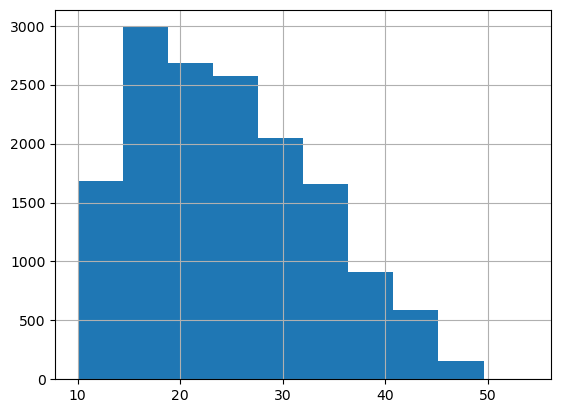

In [82]:
# TODO
import seaborn as sns

time_column = scooter_orders['Time']
time_column.hist()



<Axes: xlabel='Time', ylabel='Count'>

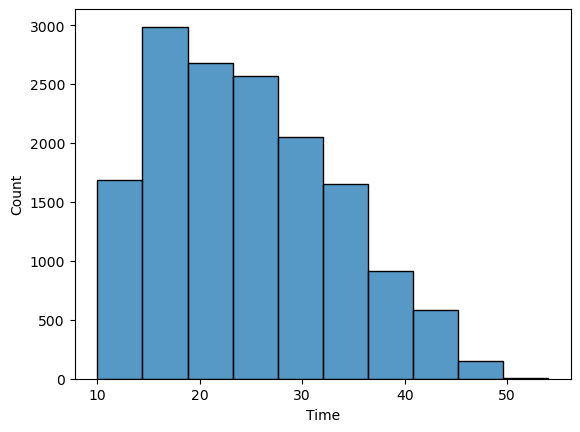

In [85]:
sns.histplot(data=scooter_orders, x='Time', bins=10)

Using the histogram, we can verify the time duration in which most orders can be delivered. On the rare occasions that it takes longer, it could be because the restaurants are overcrowded, or the traffic jams are worse than usual.

We could then determine a reasonable time range to provide to customers, and inform them that it might take longer in certain unexpected situations.

# Probability Distributions with Scipy

A _probability distribution_ describes phenomena that are influenced by random processes: naturally occurring random processes; or uncertainties caused by incomplete knowledge.

The outcomes of a random process are called a _random variable, X_. The _distribution function_ maps probabilities to the occurrences of X.

SciPy counts 104 continuous and 19 discrete distributions that can be instantiated in its `stats.rv_continuous` and `stats.rv_discrete` classes. Discrete distributions deal with countable outcomes, such as customers arriving at a counter. Continuous distributions compute the probability of occurrences between two outcomes or points on the x-axis, such as variations in height, temperature, or time.

Distributions related to engineering and technology, which attempt to model, for instance, the lifetime or time to failure of equipment, as well as in biology and pharmaceutics, have blossomed in recent years, driven by the fast increasing availability of sensor data and other large sources of quantifiable information.

## Normal Distribution

The normal distribution, also called the Gaussian distribution, is a continuous probability distribution that is symmetric around its mean. It is arguably the most famous distribution due to its mathematical properties and its ability to describe many natural phenomena. It is typically great for mapping population data, for example, household income distribution. 

The normal distribution is characterized by two parameters: 
- the _mean (μ)_, which represents the central tendency of the distribution; and
- the _standard deviation (σ)_, which measures the spread or dispersion of the data.
By knowing these two parameters, we can fully describe a normal distribution.

#### Distribution Fitting

Fitting a normal distribution to a dataset allows us to estimate these parameters from the dataset. The `norm.fit` function in `scipy.stats` takes an array-like object as input and returns the maximum likelihood estimates (MLE) for the mean and standard deviation of the underlying distribution.

Let us fit a normal distribution to our observed dataset of delivery time. To use the SciPy function, we need this data in NumPy array format.

__EXERCISE:__

Convert the delivery time data into a NumPy array. 

In [104]:
# TODO
import numpy as np
time_array = food_deli_data['Time'].to_numpy()
isinstance(time_array, np.ndarray)

True

__EXERCISE:__

Now use the `norm.fit` function to fit the normal distribution to the data. Note that it returns two values, corresponding to the two parameters.

In [108]:
# TODO
import scipy.stats as sp

mean, sd = sp.norm.fit(time_array)
mean

26.29460662821047

The mean is an estimator of the center of the distribution. The normal distribution distribution fit by SciPy should have the same center as the mean of the sample, as we have created a sample distribution.

__EXERCISE:__

Compute the mean of the sample array directly using NumPy, and verify that it has the same center.

In [109]:
# TODO
time_array.mean()

26.29460662821047

# Hypothesis Testing using SciPy

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a t-test to decide whether the means of two sets of observations are significantly different. 

Supppose we want to determine whether the average delivery time using motorcycles is significantly different from the mean delivery time of 26 minutes.

__EXERCISE:__

Obtain the NumPy array containing delivery time data for motorcycles.

In [115]:
# TODO
time_array_motorcycle = food_deli_data[['Time']][food_deli_data['Vehicle']=="motorcycle"].to_numpy()
isinstance(time_array_motorcycle, np.ndarray)
time_array_motorcycle.shape

(26435, 1)

Consider the null hypothesis that the expected value (mean) of the motorcycles delivery time samples is equal to the given population mean. The `stats.ttest_1samp` function does two-sided test and returns the t-statistic and p-value.

__EXERCISE:__

Run the `ttest_1samp` function on the motorcycles delivery time data and given population mean. Let the significance value be 0.05. Can we reject the null hypothesis?

In [119]:
# TODO
sp.ttest_1samp(time_array_motorcycle, food_deli_data['Time'].mean())
print(time_array_motorcycle.mean())
print(food_deli_data['Time'].mean())

27.60567429544165
26.29460662821047


Now let us investigate whether the mean delivery time using motorcycles is significantly different from the mean delivery time using bicycles.

__EXERCISE:__

Obtain the NumPy array containing delivery time data for bicycles.

In [120]:
# TODO
time_array_bicycle = food_deli_data[['Time']][food_deli_data['Vehicle']=="bicycle"].to_numpy()

We can use the `stats.ttest_ind` function to do a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values.

__EXERCISE:__

Run the `ttest_ind` function on the motorcycles delivery time data and the bicycle delivery time data. Let the significance value be 0.05. Can we reject the null hypothesis?

In [122]:
# TODO
sp.ttest_ind(time_array_motorcycle, time_array_bicycle)

Ttest_indResult(statistic=array([1.00669887]), pvalue=array([0.3140887]))

In [123]:
print(time_array_motorcycle.mean())
print(time_array_bicycle.mean())
print()

27.60567429544165
26.426470588235293


In [127]:
sp.ttest_1samp(time_array_bicycle, 24.5)

TtestResult(statistic=array([1.715031]), pvalue=array([0.09096156]), df=array([67]))